In [6]:
import pandas as pd
import os
# import directory
os.chdir('C://Users//MANDY//Desktop//dataset')

In [219]:
# import train and test
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic.csv')

In [235]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Survived          200 non-null int64
PassengerClass    200 non-null int64
Sex               200 non-null object
Age               200 non-null object
SiblingSpouse     200 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


Text(0.5, 1.0, 'survived or not')

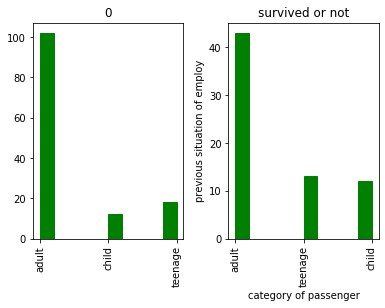

In [239]:
train.hist(column='Age',
           by='Survived' ,figsize=(6,4),color = "green",
          edgecolor = "green") 
plt.xlabel('category of passenger')
plt.ylabel('previous situation of employ')
plt.title('survived or not')

Text(0.5, 1.0, 'passenger  or not')

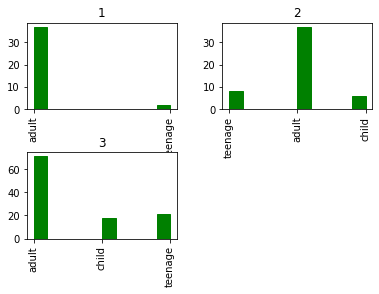

In [240]:
train.hist(column='Age',
           by='PassengerClass' ,figsize=(6,4),color = "green",
          edgecolor = "green") 
plt.xlabel('Age categiry')
plt.ylabel('previous situation of employ')
plt.title('passenger  or not')

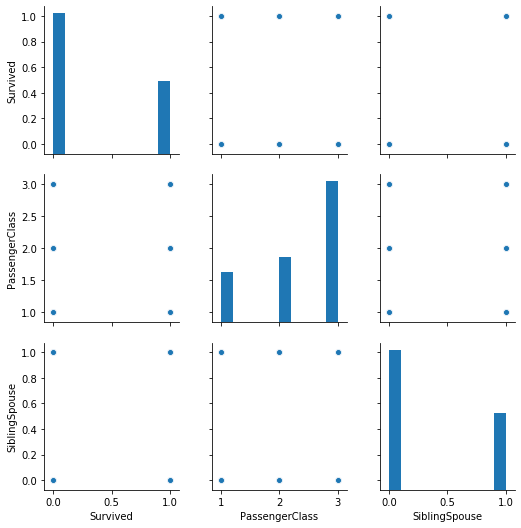

In [243]:
import seaborn as sns
sns.pairplot(train)
plt.show()

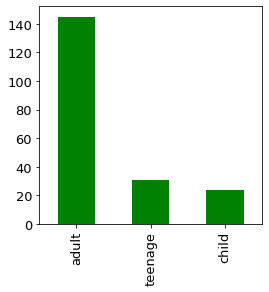

In [256]:
train['Age'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="green", fontsize=13)

plt.show()

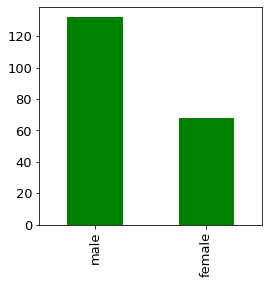

In [255]:
train['Sex'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="green", fontsize=13)

plt.show()

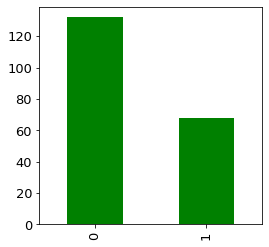

In [254]:
# for train
train['Survived'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="green", fontsize=13)

plt.show()

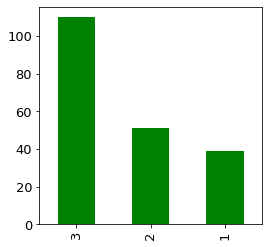

In [253]:
train['PassengerClass'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="green", fontsize=13)
plt.show()

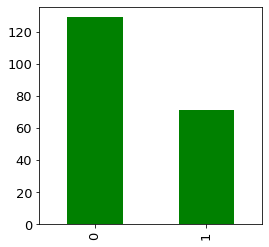

In [257]:
train['SiblingSpouse'].value_counts().plot(kind='bar', figsize=(4,4),
                                        color="green", fontsize=13)

plt.show()

In [258]:
train.corr()

,Survived,PassengerClass,SiblingSpouse
Survived,1.000000,-0.176286,0.041028
PassengerClass,-0.176286,1.000000,-0.016004
SiblingSpouse,0.041028,-0.016004,1.000000


In [104]:
train.head()

,Survived,PassengerClass,Sex,Age,SiblingSpouse
0,0,3,male,adult,1
1,1,1,female,adult,1
2,1,3,female,adult,0
3,1,1,female,adult,1
4,0,3,male,adult,0


In [105]:
test.head()

,Survived,PassengerClass,Sex,Age,SiblingSpouse
0,0,3,female,adult,0
1,1,3,female,adult,0
2,1,1,female,adult,0
3,1,1,female,adult,0
4,1,2,female,adult,0


In [11]:
print(len(train))
# print len of train & test
print(len(test))

200
20


In [36]:
train.shape

(200, 5)

In [12]:
# classification task 

In [116]:
# create dummy dataset for categorical variable
df = pd.get_dummies(data=train, columns=['Sex','Age','PassengerClass'])

In [107]:
df.head()

,Survived,SiblingSpouse,Sex_female,Sex_male,Age_adult,Age_child,Age_teenage,PassengerClass_1,PassengerClass_2,PassengerClass_3
0,0,1,0,1,1,0,0,0,0,1
1,1,1,1,0,1,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,1
3,1,1,1,0,1,0,0,1,0,0
4,0,0,0,1,1,0,0,0,0,1


In [117]:
#drop previous column
train=train.drop(['Sex','Age','PassengerClass','Survived', 'SiblingSpouse'],axis = 1)
train = train.join(df)

In [63]:
train.head()

,Survived,SiblingSpouse,Sex_female,Sex_male,Age_adult,Age_child,Age_teenage,PassengerClass_1,PassengerClass_2,PassengerClass_3
0,0,1,0,1,1,0,0,0,0,1
1,1,1,1,0,1,0,0,1,0,0
2,1,0,1,0,1,0,0,0,0,1
3,1,1,1,0,1,0,0,1,0,0
4,0,0,0,1,1,0,0,0,0,1


In [118]:
#seperating independent and dependent variables
y = train['Survived']
x = train.drop(['Survived'], axis=1)

In [230]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
# x_train,x_test,y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.4,random_state=0)
parameters = {'max_depth':range(5,20)}
#import models
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=5)
# fit train & test
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.8 {'max_depth': 5}


In [ ]:
#prepare test data

In [220]:
# prepare train & test data for predictions
df = pd.get_dummies(data=test, columns=['Sex','Age','PassengerClass'])
test=test.drop(['Sex','Age','PassengerClass','Survived', 'SiblingSpouse'],axis = 1)
test = test.join(df)

In [221]:
test_x = test.drop('Survived',axis = 1)

In [231]:
# perfrom prediction task
tree_model.predict(test_x)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1],
      dtype=int64)

### Confusion matrix for better explanation

In [232]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
predicted = [1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,1,0,1]
actual = [0,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,1,0,0,1]
results = confusion_matrix(actual, predicted) 
  
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted))
print ('Report : ')
print (classification_report(actual, predicted)) 

Confusion Matrix :
[[6 2]
 [3 9]]
Accuracy Score : 0.75
Report : 
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.82      0.75      0.78        12

    accuracy                           0.75        20
   macro avg       0.74      0.75      0.74        20
weighted avg       0.76      0.75      0.75        20



[Text(185.3357142857143, 201.90857142857143, 'X[1] <= 0.5\ngini = 0.449\nsamples = 200\nvalue = [132, 68]'),
 Text(121.96285714285715, 170.84571428571428, 'X[4] <= 0.5\ngini = 0.257\nsamples = 132\nvalue = [112, 20]'),
 Text(81.30857142857143, 139.78285714285715, 'X[6] <= 0.5\ngini = 0.22\nsamples = 119\nvalue = [104, 15]'),
 Text(47.82857142857143, 108.72, 'X[5] <= 0.5\ngini = 0.175\nsamples = 93\nvalue = [84, 9]'),
 Text(28.697142857142858, 77.65714285714284, 'X[0] <= 0.5\ngini = 0.14\nsamples = 79\nvalue = [73, 6]'),
 Text(19.13142857142857, 46.59428571428572, 'X[8] <= 0.5\ngini = 0.168\nsamples = 65\nvalue = [59, 6]'),
 Text(9.565714285714286, 15.531428571428563, 'gini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(28.697142857142858, 15.531428571428563, 'gini = 0.19\nsamples = 47\nvalue = [42, 5]'),
 Text(38.26285714285714, 46.59428571428572, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(66.96000000000001, 77.65714285714284, 'X[0] <= 0.5\ngini = 0.337\nsamples = 14\nvalue =

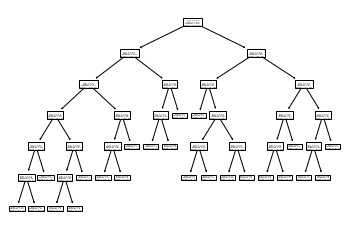

In [233]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='gini')
clf = clf.fit(x, y)
tree.plot_tree(clf) 

### Calculate gini index

In [193]:
import scipy.interpolate
import scipy.integrate
import numpy as np
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=np.float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses
data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV0AAADnCAYAAAC9roUQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nO2de3zU1Zn/308CJGOCBYQxBCFEEBSQtlGKoDEgChZbK15o2d4X2tq6xV6o3e3a7f5kt9vLbtftjZYltNbuyk1p1ZRSC0ZraWlZRY1BBIMRIlBCEGKYMVye3x/nGzuEmWRm8r1Nct6v17wgycz5fs53zvc55zznnOcRVcVisVgs/pAXtACLxWLpS1ija7FYLD5ija7FYrH4iDW6FovF4iPW6FosFouPWKNrsVgsPmKNrsVisfiINboWi8XiI9boWiwWi49Yo2uxWCw+Yo2uxWKx+Ig1uhaLxeIj1uhaLBaLj1ija7FYLD5ija7FYrH4iDW6FovF4iPW6FosFouPWKNryRkikcgBEVE3X5FI5EDQ9bL0LcSm67HkCiKibrdXEUFVxdVCLZYu6Be0AIslW9avX09JSQkDBgygoKCAN954g2g0SmNjI4MHD6a9vZ1JkyaxfPlyFi1axLJly1iyZAki1sZagsOOdC05Q7KRbkNDA2VlZagqe/fupby8PNMy7UjX4it2pGvJSZYuXUpVVRWxWIx9+/ZRWVnJCy+8QEFBAY2NjcTjcS688EK2b99OS0sLF1xwAUVFRUyfPj1o6ZY+jh3pWnKGjpFudXU1JSUlDB06lObmZqLRKNu3b2fcuHE0NTURi8VYuHAhmzZtYvTo0eTn51NXV8fu3bsZN24cQ4YM4Yorrugo0450Lb5ija4lZ7ALaZbegHUvWHKKJ554AoCioiLa2tpoampiwYIF1NTUUFFRQUNDA83NzVx22WVs2bKFw4cPc8sttzBkyBDuvfdeRo4cSVlZGf379+fyyy8PuDaWvogd6VpCjZitBlcDXy4oKJjz5ptvurq3vLCw8Gg8Ho+qarub5VosqbCHIyyhRETyRGQe8AdgBfCLN998s0hVxY0Xpu3Pjsfj24CXReTzIlIcZJ0tfQM70rWEChEZAHwI+BLwBvBNYL2qnvLwmpcDXwZmAMuA76nqIa+uZ+nb2JGuJRSIyEAR+SLQAHwAuAN4l6qu89LgAqjqNlW9DZgOnA/sFJHvi0hmm34tljSwRtcSKCJyvoj8K7AHmALcqKqzVXWz61sVukFVd6nqp4CJmFH2NhH5HxF5u586LL0ba3QtgSAiF4rID4EdwBBgqqp+QFWfDlgaqrpfVf8euBB4FtggIhtEZIbYM8SWHmKNrsVXROSdIrIK+BNwBLhEVT+tqi8HLO0sVPWoqn4LKAceBJYDfxSReSJinx1LVtiFNIvnOKPDmZjFqonAfwLLVbU1UGEZIiL5wE2YepwLfBv4uaq+GagwS05hja7FMxwjNQ9jpAYC3wL+J9eNlNOJzMDU61L+2okcC1KXJTewRtfiOiJSAHwEs+2rBfgG8LCqng5UmAeIyDuBu4DrMO6H/1LVg8GqsoQZ65eyuIaIvE1EvozZiTAP+AQwTVV/0RsNLoCqPqOqC4B3AW8DdojIMhEZE7A0S0ixRtfSY0RkuIh8A7PH9lLgelWdq6pP+L3tKyhUtUFV7wAuBg4DW0VktYhUBCzNEjKs0bVkjYhcJCLLgReAIuAyVf2Qqj4XsLTAUNW/qOrdmB0PW4GHReQxEZllt5tZwPp0LVnQ6djsD4Hv22OzyXGONX8Q4/dtwxxrfsjrU3aW8GKNriUtnFHadRhjexHwHWCFqr4RqLAcwdnX+17M/RuG2W72M1WNByrM4jvW6Fq6RET6AbdgjMUAzLavB1T1RKDCchSn87oK+HugAvgvYJmqHg1UmMU3rNG1JEVEIsDHgCXAfsy0uKa37kIIAhG5FON2mIsJX3mvqu4PVpXFa+xCmuUMRGSwiHwFs+3r3cBHVPUqVX3EGlx3UdXnVfXDwGVABHhBRP5bRMYFLM3iIdboWgAQkREi8u/AbmA8MEtVb1TV3wcsrdejqq+o6mJgHNAEPCUiD4rIuwKWZvEAa3T7OCJysYhUA88D+cA7VfWjqvpCwNL6HKrarKr/jNlu9iSwVkQ2i8gcu92s92B9un0UEfk5ZiP/SOAHwA9U9XCwqiyJiEh/TED3uwAB+mM6xeOBCrP0CGt0+yAiUgjEgBcxBxrsQxxinFHu9zDZNBaq6sqAJVl6gDW6FovF4iPWpxtyIpHIARFRN1+RSORA0PWy9Ay324VtE/5hR7ohR0RcjxkjIjhpyC05itvtwrYJ/7AjXYvFYvGRfkELsGTG+vXrKSkpYciQIezdu5fi4mKi0SiNjY0MHjyY9vZ2Jk2axPLly1m0aBHLli1jyZIl2B1HvZeONtHS0kJBQYFtEyHHjnRzjLq6OhobG3n55ZfJz88nGo1SX1/P+PHjicVitLW1sWfPHsaOHcuyZcuYO3cu9fX1Qcu2eEhHmxCRlG3i0KFDlJeX88gjjzBhwgTbJgLEGt0cobq6mpqaGmbPns3AgQMZNmwYu3fvZu/evRw7dowNGzYwbdo0Tp8+TWFhIVVVVYwbN45NmzbR3NzM9u3bg66CxQOqq6upqKigvLwcVaW4uJhNmzYxcOBAamtrqa+vZ+bMmezevZtJkyZx6aWXcurUKVatWsWbb+Z0qrqcxS6khRy7kGZJhl1Iy12sTzcHWL16NSUlJQAUFRXR1tZGU1MTCxYsoKamhoqKChoaGmhubmbWrFls3ryZpqYmbrnlFgYPHsxPf/pTRowYwciRI2lvbw+4Nha3SLddHD16lNLSUvbv38+UKVOIxWLs2LGD3/3ud1x//fVcddVVAdekb2FHuiEnEokciMfj57tZZmFh4cFYLFbiZpkWf4lEIofi8fhQt8qzbcI/rE835MRisRJVlY4XsAhoBEYm/r7zC5gM/AV4d+e/2YcrdxGRiIj8UzwezwO+CkS6agfdtJFyYD3QEI/HFwVasT6EHenmECJyM/B9YIaqvpTG+6cBvwTm2RCNuY0Tf+G9wL3A08AXVbXRpbLnAN8FdgGfU9XdbpRrSY4d6eYIInIt8CPghnQMLoCq/gH4MPCQiEz2Up/FO0TkIqAGk73jU6p6q1sGF0BVNwKXYsJJ/lFE/kVEitwq33Im1ujmAE4w6/8FblXVZzL5rPNALQY2iMgYL/RZvEFEikTk68AfgE3A21X1MS+upartqvot4O3AhUC9iNxq4/i6j3UvhBwRmQBsBhap6qM9KOdTmLislar6mlv6LO7jGLrbgH8HngC+7Pd3JiJVGFfWQWCxqtrTFC5hjW6IEZEy4HfAP6jq/7hQ3leABUCVqrb0tDyL+4jIREzs3POAv1PV3wWopR/waeCfgPuAe1T1WFB6egvWvRBSROR84DHg224YXId/AzYCj1qfXbgQkbeJyHeAWuAhTHD5wAwugKqeVNXvAROBIcAOEfmQdTn0DDvSDSEi8jbMw/dLJ2eWm2ULUA2MAN6rqva0RICISB7wIeAbwK+Ar6jqX4JVlRwRuQLjcogBn1VVe7Y8C6zRDRkiEsGMRp/F+NJc/4KcaeMa4ATwN6p6yu1rWLpHRN6JMWIDgDtU9U8BS+oWEckHFgJLgbXAV1X1SLCqcgvrXggRTiLCNcCrwJ1eGFww00bgb4ChwA/sdNFfRGSIiPwQ2ACsBKbmgsEFUNVTqrocuASTLHOHiCxyRuyWNLA3KiQ4jXYlpiF/XFVPe3k9VY0DNwGXAf/i5bUsBhHJF5FPAjuAU8Alqlrt9XftBaraoqp3AO8GPo7Z3/uugGXlBNa9EAKckea9QAUwx8/svCIyFLND4r9V9Tt+Xbev0ckf+neq+mzAklzDab8fwhze+BVmt82hYFWFFzvSDQdfBaowC1u+pkNX1WZgNrBYRD7u57X7AiISFZGVwIOYjvXq3mRwAdRwP8blcBR4QUTucNYOLJ2wRjdgROSzmKO6c1T19SA0qOpeYA7wdRGZF4SG3oaI9BORxcALQAvGlfBzr/z0YUBVj6rqF4GZwC3ANhGxcSM7Yd0LASIiH8RsFapU1VcCloOIVAC/Bj6gqpuD1pOrOKe5voeJ8tYnT3MlnKr7D8z2x7tUdX+gokKCHekGhIjcgGmQc8JgcAFU9WnMg7JKRKYErSfXEJERIvK/wP3APcB1fdHgwlsuhzUYl8Ne4HkR+aKzQ6dPY41uAIhIJfAT4MawPZSq+gQmZu8jInJJ0HpyAREZICJ3YfZWN2BcCet6syshXVT1DVX9CjAduBZ41omY12ex7gWfEZF3AL/BHEr4bdB6UiEiH8FsJbtKVV8NWk9YEZHZmFi0L2P2VttYtCnoFBP4/zAxgftc27IjXR9xztZvAT4TZoMLoKo/w/gld4jI7UHrCRNO9oZyEXkIWAYsUdUbrMHtGsfl8DAmlsPzwNMi8o8iMrgvHdCxI10fEZFGIAKUqWosaD3dISJRoAn4k6peGbSeMOAcYjkBvAl8Hfh356CJJUNEZDTwn8D7gLWq+v5ABfmENboWSwaIyLmYUVq1qt4TtJ5cR0TOAX4LHFDVm4PW4wfW6FosFouPWJ9uBkQikQMiom6+IpHIgaDrlQo36huW+rn53YWlTr0Jt5+tMH9HdqSbASLi+i4gEcFJhx063KhvWOrn5ncXljr1Jtx+tsL8HdmRrsVisfiIDUjRA9avX09JSQnHjh1j0KBBqCrRaJTGxkYGDx5Me3s7kyZNYvny5SxatIhly5axZMkScm13TEc9W1paKCgooLi4OKfr2VGfvLw84vE4BQUFOV2f3kjHd3T8+HEKCgro169fr/mO7Ei3B8ybN481a9YwYMAADh8+TGNjI+Xl5bS1tRGNRjl16hRbt27luuuuo7a2lqKiInLNnbN06VLOO+88du7cyTnnnENVVRV1dXUUFhZSWFjIkSNHOP/883nssccYOXIkL7zwAtOnTw9146+rq6OxsZHDhw9z+vRpotEo9fX1jB8/nlgsRltbGydOnKC8vJyNGzcyceJE6utDdXCwV5PY5vLy8pg6dWrKNnfixAkaGhqYO3duqNtcItboZkF1dTU1NTVs3bqVa6+9luLiYpqamigpKeGBBx7g4MGDlJaWcvz4cUaNGsWoUaM4deoUgwcP5vHHH2fLli1BVyFtSktLaW1t5ZJLLuH48eNs374dVWXXrl3s2bOHhoYGysrKKC4u5h3veAcTJkygubmZ7373u5w6Fb4sQNXV1VRUVFBeXo6qUlxczKZNmxg4cCC1tbXU19czc+ZMtm3bxqRJk5g+fTqtra0899xzoaxPbySTNnfzzTczbNgw6urqePDBBzl9Ovzx4O1CWgbYhbSsyghF/exCWrjpSwtp1qebIatXr6akpASAoqIi2traaGpqYsGCBdTU1FBRUUFDQwPNzc0MHTqUY8eOcfDgQd7znvcwbNgwfv7zn9O/f3+mTZvGX/4SyqSvZ5Buffft28eYMWOYMmUKP/7xj5k2bRqlpaUBqz+TdOvS4eetrKzk/vvvZ9SoURw7dozBgwdz1VU2PKxXZPJszZo1iy1btlBRUcH+/ft5/fXXefrpp7n88stD/x3ZkW4GRCKRA/F4/Hw3yywsLDwYi8VK3CzTLdyob1jq5+Z3F5Y69SbcfrbC/B1Zn24GxGKxElWVjhfm/q0AHgH6Jf6t0/s+hgn5N6zz38LaMODs+jp1mQTsA/Kdn78CLEtV97DUL1ldEr7DXcAU5+eJmHgT+WGvU28iRVubDDRjYpV0/ls+JrffF3PtO7JGt2d8HngXJkxjylUWVb0Pk1r9IREp8EucR9yGCU7SsWKxBrhFcjcf1tsxbrb/A3DiGx/BxH+1BIQT7Pw+4O+ThX902t/Hga+IyMV+6+sJ1uhmiYi8F/giJpnkG2l85B8xvfaPczWMnaN7PsbQAqCqL2MyA1wdlK4eMh9Y02kVZ7Xze0twfAU4AKxM9Qan7f0T8NNc6vSt0c0CEXk7pjHcnG4QZqdn/jBmynSXh/K8ZBJQBGzt9Ps15KCRcjqR95PQiTisBW4VkXz/VVlE5J3AHcAn0tjS8COgDTMAygms0c0QESkBHgb+TlU7G58uUdU2TOT8z0puZt2dj3EtdH4Q1gI359Jow6ECUOCZxF+q6k5MUslwL4P3Qhz3230YX21Td+93BjMLgSUiMslrfW5gjW4GiEgE+AUmlurqbMpwGtJNwHIx2XdzggTXwln1VtU9wCuY1Nu5xHxgdYrRVE6O3nsBXwX2AD9P9wNqErt+BeNmCH3iS2t008QxOisxuxCW9qQsVd0GfBr4pYiEazNrat4ODAC2pfh7TvlBk/mnO9GxQGhdDD4hJgP1J4BPZXFSYgVmzeTvXRfmMtbops8/AaOBv3Xj6IyqrsPk13pYTPT8sJNswSmRdcC8XBhpOEwB2oHnkv1RTb6zJqDKT1F9FREpxLgV7lTVjGPhOu1yEbBYTPLX0GKNbhqIyALM9pSbXM6H9W9APfAzMbm3Qkkao0JUtRGz33WWX7p6SHedCFgXg5/cg3kWsnLbAajqPuBLGDfDALeEuU1oH/SwICJXAP+F2Rp20M2ynQf+E0AJptGFlXcCAjzdzftywkil04k45OoCYU4hItMxO3s+7cIs8j7MFsa7eyzMI6zR7QIRKQMeAj6uqs97cQ1VfROYB/yNiHzYi2u4wPtJveCUyFrgfWEeZThcAbwB1HX1JlVtwCwQzvBeUt/Eca39FLMb6FBPy3Pa6CeBT4nIZT0tzwus0U2BiAzEHO/9tqrWeHktp7G9F/gPEQlVqvMMRoUd07sdwLVe6+oh6bgWOsiJ0XsO86/ANlV90K0CVXU/5rTofWE8AWqNbhKcFev/Bf4A3OvHNVX1BeAjwDoRKffjmmlyOXACeDbN96/BjIxDieM7vw0zKk+HDhdDriwQ5gwicjWmQ/usB8U/ALwE/D8Pyu4R1ugm51vAOZgpj29h2FT118DXgUdF5G1+XbcbMhkVAjwI3BjGEYbDNOB1p5PrFmeBcDdwjaeq+hgiUgz8BOPHPex2+U57/TTwMWddJjRYo9sJEfkE8B7gVlU9EYCE7wO1wKqgF3C6OhCRCufwx/PAbK909ZCM6uNgXQzu8w3gKVV92KsLOAvfn8XsZoh4dZ1MsUY3ARG5BvgX4D2qeiQIDU4PfScmdN13gtCQwFTgON0sOCUhlAclHLdRJq6FDtYCN+XAAmFOICKzgPcBn/P6Wqq6FuMa69GBJjexRtdBRMZh/EAfUNVdQWpR1ZMYo3WdiHwmQCmZuhY6eBB4j7PhPUxcCRxS1Rcz+ZCq7gVeJPwLhKFHRM4FqoFP+jiwuQOzOygUsTSs0QVEZAjwKPCPqvp40HoAVPV1jJvjn0TkOr+vn7Dg1O2uhc44J4p2A//htq4ektYujBT8Bvias6vFkgWOwf1P4LequsGv66pqM/AZ4CdhWKTu80bXCdP4F+AJVV0RtJ5EnHihCzALaz/y+fJVwNF0F5yScCGmoYcCZz/orWRvdE9gAtYPcU1U3+NR4G+Br/l9YVX9BeaAT4Pf1+6MPWkD12H8p/8dtJAU/AE4iP9BwjcD2RpcgIsJV9yCh4HzgWxXyv8NOASkFT/ZkpQG5/VaQNf/ImYBL1BsYkpLUkTkBeBeVQ1rZ5QRIvIfmADys/3cBmixdMYaXYvFYvGRXuPTjUQiB0RE3XhFIpGMQ8t5gVt18ro+bugMyz2H3LnvQZIr9yiMOnvNSFdEXJs1ighOmudAcatOXtfHDZ1hueeQO/c9SHLlHoVRZ68Z6VrSo7eNSqF31snSe+mVI93169dTUlJCS0sLF1xwAbFYjGg0SmNjI4MHD6a9vZ1JkyaxfPlyFi1axLJly1iyZAniZEYPywilo04d9cnLyyMej1NQUJB1fRLv09KlS6mqqiIWixGJRKisrKSmpoaKigoaGxuJx+MMGDCAo0ePMnfu3ERdZ9yfzjqPHz9OQUEB/fr1S1tnT+6523XqXJ9zzz2XkydP5mw78oJkz9uQIUPYu3cvxcXFvnzvmejsiUanHDvS7Yq6ujoaGxsREVpaWohGo9TX1zN+/HhisRhtbW2cOHGC8vJyNm7cyMSJE6mvrw9adko66nP48GFOnz6dtD5Hjhxh+PDhLFu2jAkTJnRbn+rqaioqKigoKODkyZNEIhFWrFjBwIEDqa2tpb6+npkzZxKPxxk/fjz79+9n9equQxbMmzePNWvWkJeXx7Fjx2hsbKS8vJy2tjai0SinTp1i69at3HbbbdTU1FBUVIRbnX51dTU1NTXMnj2b1tZWhgwZws6dO3nyySc5duwYGzZsYNq0aZw+fZqSkhJGjRrFww93fey/4743NjambEd79uxh7NixPPLII1xzzTW88EJPdtnlJh336eWXXyY/Pz/pfTp06BDl5eWsXLmSL3zhC28ZM7/oaJuvvfYa7e3tKdvmvHnz2LRpEwAnTngTeqXXjXSrq6spKSlh6NChNDc3E41G2b59O+PGjaOpqYlYLMbChQvZtGkTo0eP5tSpUzz77LPs37+fO+64g/z8/NCMUEREV6xYkVF98vPzqaur48UXX2Tx4sUMGDAg5Ui3B7rOGulmqjMajbJ582b27NnDJz/5yQ4D3OORrht16sl937Fjh2+juCDJ9nnr+N537drF4sWLKSgo8Hykm+132drayvz58123Cb3O6LpUVigeFi8WAUREV61aRUlJCQBFRUW0tbXR1NTEggUL3pqKNzQ0cPToUYqLi6mqquKBBx6gtLSUiRMnMmzYsKTuBbc0ZvFZra2tzag+K1euZMKECYwdO5ahQ4e63jH1tE5hJ1fuURh19qoTaatXr07LmOzbt4/y8nIOHDjA9OnTefXVVzl06BDFxcVcdVUoYmK8Rbp1Onr0KKWlpezfv58pU6awe/du4vE4/fufGXu7sLDw4Ac+8IHzk13rgx/8YFqaCgsLz8oVl8m9HzNmDFOmTOH+++9n8uTJjBgxIrObkkTPjBkzzqpTuvXpKCOb+nT42CsrK9+qz9GjR8nL65WeuzNI9x41NTVxxRVXUFZWxrp166isrOTZZ5/lnHP8SYKdrs7m5mbGjh3LK6+8wtSpU8+wC27Sa0a6kUjkQDweT2pMMqWwsPBgLBYrcaOsnuBWnbyujxs6w3LPIXfue5Dkyj0Ko85e0x3HYrESVZWOFyaewmbgy4m/T/j7F4CngPzOfwvLg9K5Tgnavwl8w/l/HiYewORk7/WjPl3oXI9J6inAIKAVGBSExkxI0pbmYO7xWdqB84AmYGaY6+Q2XXznYzAxKvo7P98NfD+EbfN64A8JP/8MWOyHzl5jdJPwaUzKnVThBb/r/LvYHznuIHJmNgfHYRW6vGRiQiDOAn4JoKpHgceBG4PUlSli0iatABY5dTgDVW0BbgdWiklB09eZDzyoJiY0mLZ5q5gA8mHi/ZwZcc637CC90uiKyBhMQrqPqeqpZO9xfv9x4G4RGe+nvh5yOXCSMxNFrgHmi9/7cLrmRuB3emag6tB1Dmnwn8CvVPWxVG9Q1UeBJ4Bv+6YqvJwRs1hNQoD9QGVgijohJgPI+4B1Cb9+DJgoIhd4ff1eZ3TFBN/+CfCvqrqzq/eq6m7gnzE5lMLWE6ciWTaHbZhF0bcHIykpyQKGPwJcLSKDA9CTMSJyAzAT+FIab/88cIMEEHA+LIjIRUAp8GSnP4Utx9y1QL2q7uv4haq2Y2Zlt3p98V5ndDHuAuGv7oPu+CEQw8TaDDUJroUzjFmCiyEUDduZks/AcS10oKrHgE2YUUaocTqGHwN/q6qt3b1fTaaPTwArxGRI6IvcBqxLMrtcC9wiASdaTSBVBhFfcvv1KqPruAnuxizeJHUrdEZVT2Oi2X9JRCZ4qc8F3oXpIJ5P8rc1wPtD4mK4EahN5gMlRJ1DN3wXeEgzSN+kqhuBXxN8QtGg6OwnBd7KgLKXEAS1F5ECTPt8MMmfNwHjRGSUlxp6jdF13AM/Bf7ZcRukjaq+gjHW94WoN05GV4kinwEUqPBXUlK6ykX2KHClmLx0oUREbgKuAP4hi48vAWaJyLvdVRVuRORiYBjw+xRvCUtnOxt4XlXPyl6hqieAX+Cxi6HXGF2MeyCGcRdkw3LgCPBl1xS5iPw1UWTSAAiOIQ489bmIDMKkFkoa2MCZqj8G3OSnrnQRkaGYNvRxVW3L9PNO/RYCy3PFd+0StwFru5hhrgFuDsGg5q2dPynw/BnqFUbXcQt8CVjouAsyxjFaC4HPichkN/W5xBVAq3adKDIMuxhuAjZ14wcN8y6G7wMPqOpT2Ragqpsx/ux7XVMVfuZjfLdJcWaTDcA1fgnqjIgUYjJsP9TF2x4HxojIaK905LzRdXrO+zDp0/f0pCxV3QvchXEzDHBDn4t02agdngPagSney0lJOjprgCucUWVoEJHbgHdgXE095csYN0pO7UvOBmfQMxjY0s1bg3YxXA88o6opYyc7+4sfwozcPSHnjS6mcR/BvWy+P8VkK/2KS+X1mO5cCx0EvYvB8dNeidkalhJn2r4RmOeHrnQQkSjwPeCjqhrraXlOHT8O/EhEzutpeSFnPsa10N0scy1wk4j07+Z9XtHVWkMinj5DOW10HTfA5zBuBVeCSDjlfAL4jIiEYVEKYDpwWFV3pPHeIF0MNwG/UdU30nhv4P7nDpx79SPgJ6q61a1yVfV3mHp+360yw0aqbYzJUNVXgZcwJxV9RUQiwFy6di108AQwSkQu9EJLzhpdZ/p/H3CX4xZwDWdl8wsYN0OBm2VnSdKtOCmoA94ApnonJyWZ6NwATHFGmEGzABiHOSjjNv8IVIiI55vuA2IiUAT8Mc33B+XPfzfwZ1X9S3dvdFwMD+LRoCBnjS5m+v8axh3gBf8D7Aa+5lH5aeFshbuV7v2kQHCxGBz/7BXAr9J5v6oexxjem73U1R0iMhxz1Pejqvqm2+U79fwY8P2QdDBu836MayHdmeY64H0BrJlkMiAAD10MOWl0nWn/Z4BPuOVW6IxT7u3A34rIu7y4RppcBRzs7khzJ9YCtzm+YPhDwsQAABluSURBVL+YB/w6w21WgS6sOFPj5cCPVfX/vLqOqv4BMyv7YUgOr7hCJq6FDpyjt/WAb8elRaQIs4i2PoOP/Q4odY42u0rOGV1nun8f8IVkG5zdRFUPYo4V3+dsNwmCjBo1gLOt7HVgmieKkpOxTszprQoRCSoE4keAkcC/+HCtrwETCO9WuWyYDBQAf87wc353tnOBP6pqc7ofcPYbr8ODXQw5Z3QxjfdlzPTfc1R1DebY7VI/rpeIsx3uVjI3ZuBjw3amzVNI07XQgbNL4FHgFi90dYUTTerbGLdCu9fXU9U48FHgvwLsZNymqxOSXbEOuNHHgUw2AwIwi6Cud5I5ZXRFZCbmAMOnvHIrpOAO4EMicq2P1wRzsmtfpseaHR7CaL7UZU3JuBkT/jCbrVa+uxicuLcrgO+p6rPdvd8tVPXPmK2Ny3M99q6IjMP4qjOZsgNvLVQ/hzmS6ymOzXg35nhvpvweGOoccXaNnDG6IjIVkwniv51pv2+o6iHM0dDHRORqHy+dbQ/dwRCMX9ozsvHrdeI3wGQR6VmitMzYg/GVf8PHa3awFOPPfDGAa7vJBzFhHNMKLJUEvzrbf8Dsrsh44c7Zd7wOl3XmjNHFGJAm3DsEkSk/xURK8mWjuxOX9VNAVh2MqtZhprPfc1NXEv4BE3O2MZsPO9PudpJHTvOKfcAPnAAnvuLskPgxJrB3LrMSM+P8U5affw34oIh4bXi/Btyoqtne79eB/+dmBMJek5iyt+GM7DcB5c5IO5SIyB2Yvahjsj3JJSI/BqaoalgOo1g8xgmM9ArwAVX9dcByUuIckKgHRqWzxzetMq3RtVgsFv8IxL0QiUQOiIi68YpEIimDV1id4dHoFblSd6szfDqDau+BjHRFxLXNByKCmhTKrtPXdHqp0Stype5Wp7u4oTOo9p5LC2m9hlzppb3QmSt1t7hHrnznfukMfKS7fv16SkpKOH78OAUFBfTr149oNEpjYyODBw+mvb2dSZMmsXz5chYtWsSyZctYsmQJ4pym9GsE6abOxHKXLl1KVVUVsViMSCRCZWUlNTU1VFRU0NjYSDweZ8CAARw9epS5c+cmaktaXk90dr6XbuvsKPOee+7ptqyKigpqa2t56aWXGD9+POeeey4zZsxIWfcwt6Nc1pmXl0c8HqegoMC39j5kyBAOHDjAnDlzEnUlbZs90dnT9p6OzmQEPtKtq6ujsbGRN998kxMnThCNRqmvr2f8+PHEYjHa2to4ceIE5eXlrF27ls9//vNvfbFh03nkyBGGDx/OypUrmTt3LvX19SnLq66upqamhtmzZ9Pa2sqQIUPYuXMnTz75JMeOHWPDhg1MmzaN06dPU1JSQmVlJb/85S9TlgemoZx33nns3LmTvLw8pk6dSl1dHYWFhRQWFnLkyBFGjBjBI488wsmTJ9m8eTNz587t8n56obO0tJTW1lYGDRpEa2sr27ZtY//+/ezatYs9e/bQ0NDA2972NoqLi7n55pu5+OKLOXSo6w0cmbSjZcuWMWPGDLZs6S7mtvvMmzePNWvWkJeXx7Fjx2hsbKS8vJy2tjai0SinTp1i69atXHfdddTW1iIinDjh+862t+7n4cOHOX36dNL7eejQIcrLy1mxYgUTJ07kiSee6LLM6upqKioqKCgo4OTJk0QiEVasWMHAgQOpra2lvr6emTNn0tzczNixY3nllVd49NFHXdP5zW9+k8WLF3drPzLVWVdXx8MPJ81OlZRAR7rV1dWUlJQwdOhQmpubiUajbN++nXHjxtHU1EQsFmPhwoVs2rSJ0aNHE41G2bJlC8899xx33nknAwYM8GWkm43OzZs309LSwoc//GH69euXsufvgbazystUZ35+PnV1dezYsYMlS5aQl5eXsud3Q6cXZYqIrlixIqvvp6mpidtvv528vDxfRpDZ6mxsbOSOO+4gPz8/1Dr9au891fnSSy/51t6Tvido94ILZYV+gcop64xGuGrVKkpKzBH8oqIi2traaGpqYsGCBW9NYxoaGmhubuayyy5j5MiRrFq1ismTJxONRhk2bJirjbqzxkx1Hj16lOLiYqqqqli3bh0XXXQRI0aMOENnpmXu27ePMWPGMGXKlJRlelV3t+nLOrNt7921Iy8Mebo6O1wZlZWVPPDAA5SWljJx4sSzdCa9blBGN93K5eXlUVZWxlNPPcU111zD7t27icfj9O/fn6uuuspzo5tJY5k1axabN29m+vTptLS08PLLL3PuueeepTMSiRyIx+Pn90RbYWHhwVgsVpKNzgsvvJCdO3cyY8aMM+5nZWXlGffSbZ1elNmTB7qyspJnn32Wc84556y6u02mHVg0Gn2rs/FbZ21tbbca+/fvTzwef6uTHTZsGKdPn076XHrRjjK5n0eOHGHQoEFUVlaycuVKJkyYwNixY88ykF7oTEYgRteNynWQTiWzpa/p9FKjV+RK3a1Od/HLQHqCqobqhUmB/D7n/2OBA0B+0Lo6aczDnN+f4Pw8F/h90LqS6BwCHAWKnZ8/B6wMWpdPdZ8NbE34eQ0m6H3g2jrp/DvgZwk/bweuDlpXEp3fA+52/l+ASQY7ImhdSXRuBOY7/y8DDgP9g9aV+Ap890IiYuKMvgNz41AT0rAJE+IwTEwHjqhqx/aE3wIXi8jIADUl4ybgMf1rosigUqUEQefIZ0Gn/05F6HVKp5RRaoL2PEwAcZC7Qv6aMqoGQFUbCSgRZleEyuhivsRH1USe6iCoRHZdMZ+EdOhqgmD/AtMww8QZeaHUpErZgY+pUoJATIrvmzgzr9yvMIkwhwWj6mzEhLOcBDyW8Os1wK2OoQsLyVJGhSabcwLJUkaFrhMLm9FNljxuDXCzmCwKgdO5108gVF9u514/gTA+LG4zC3hJTcpvIDyJMDtxK/BLTUiIGdLZ3RmDDIffApeIycARFpLFdV5LyGZ3oTG6Cb3+bxJ/r6p7MCHgZvivKilXAn/RsxNFbgbGikhZAJqSkSpR5IOYVClhSC3vFakyv4Zt1pQq+HtoOnD5a8qoMwYZzuzul3iQQywb5K8pozYk/j6Ms7vQGF2Ma+FhTZ4GOzSNkBQPipqA2OsJSSMktU7fUqUEgTOieR/JU9ZvAN4pIchR5vj/L8bETO7MWuCWkMzuukoZFaZZU0fKqONJ/hYm+xEqo9tVype1GBdDfx/1nEWCayGVzlB8ual6/QTCNuJzk+uAF1S1qfMfnLWCGsLhYrgN+IUmSYqpqg2YTBwz/BaVhK6ey83ARSGZ3XWlM1Szu1AYXafXvwTjJzoLZxVyN3CNn7qScDXQlKLXB6gFRotIuX+SknIzsCFFrw+mEb5HRCI+avKL7vK1haJjJAd0OiPtm0k+a0ic3QW6gOzMXN4JJM1A4XTAzxOS2V0ojC7mS3s4Wa+fQBhGZ/NJ0QABVPUkJgtv0A91lw+0qh4AngGu902RDzgjmfdiOpVUbMQkwiz1R9XZOCPDMZiRYirCMLubATQ6I+9UhOG5vBmo6bTrqTNh0AmEx+gmWx3tTKCrkE6vfwvdZ70N1M/l9PoVpOj1EwiTP84t5gDPO37rpDhrBo8Q7B7TDtdCyvBhqvoKwc/uUi1IJvI4wc/u0tG5DrhBRAp90NMlgRtdp9e/iOQLCm+hqnsxaauv9UNXEqqAV7rp9QGeBEaIyFgfNCWjY69zd0kiHwLmisg5Pmjyi3Q6bwh+6v5+Qq7TGWHPoxtjljC7C2QB2ZmxXIpzoCoVzuxuOyGY3QVudDFf1vquev0EgnxY0ulNUdVTmOltULsYuvMVAqAms+mfgXd7rsgHHP/0ezAGoDseAyY62xR9RUx22TKM/7871gE3BTS7uwbY7ayndEeQz+UtwCMpdj11JujOFgiH0U3LSDisI4BVyIReP6U/txOBfLlOrz+Zbnr9BELRCF1iDvC0M6LpkoQ9pkEsAN0GPOSMELvEOdyxk2COsWbyXD4JXCAiYzzUk4pMdHbM7gJdQA7U6Dp+oNEYv1C3OKuQdfi/0Xkm8HKavT7AU0CJiIzzUFMyutrrnIyHgOtFpMhDTX6RycMHwXU46bpAOvDd9+6MrDsfo06J04H4PrtzZioTOPMYdUpU9SCwjYBnd0GPdNPu9RMI4mHJ6EFxXAzrCEZn2oZHVZuBPwI3eKbIBxy/9FzScy10sAkY72eQIsfPPwIzMkyXjiBFfs7urgVedNZR0iWI3QG3YY5Rd7XrqTOB72II2uim5SftxIPAe/1ahUzo9ddl+FFfRyhOrz+RNHv9BHqDi+HdwJ8dP3VaJAQp8nN0dhvwoNMpp4Uzu3sBf2d3mc4aIJjZXTY61xPw7C4wo+v0+heQWa+Pqu4HnsW/jc6zgJ0Z9voAW4DzROQSDzQloyN4Sia9PphGeJ2IFHugyS+yefjA/w4n9DqdEfWNZDjISJjd+dKJicgoYBzd7HrqjKoeArZiZkaBEIjRFZOO86uYVcdMXAsdrMaHKYLTG34OMyLKCFU9jfGJ+TWSSncb0hmoagvwe8zKf87hfEfXYzqPTHkcGCMio93UlAxnBHg+ZkSYKevwb3Z3HVCX7Bh1Gvg5u7uV9Hc9dSbQPepBjXQLgI8A2cY2fQiz0dnrVciLMCPqbBu7L/6jbHv9BAL3c/WAG4A/Ov7pjPA5SNF8YF0mroUOEmZ3c1xXdTbZuPw62AIMFZGLXdSTip7o/AUwO6jZXSBG1zmu9x3gb7IsohmjPSPXRBbUAd8F/jXLz+/GZJT4kXuSkvJ/wOtZ9voAuzD7QRe5qMlznFHuauBQD4o5CHzLy8MsIjIBWIpJPZUtfwF+4eWeXRG5BfgQ0N0BoKQ4s7tmzA4BzxCRr2MCOu3KsogW4BTwB9dEZUBgPl1V/WKSWK/pfvYUpufPxjWRyXVOquqdTmPKhiPAfsDrEH0xetYB1QFxIEzZCtIhBihZuFUS6BgtHe25nJS0Ov92FROiO9ZhDEW2HWs6COaZ+lMPyvgt5nvxkv4Yw7k/mw+rqmJij3h5L1MSSDZgi8Vi6au4OtKNRCIHRER7+opEIj2Zhvmi02uNFould+LqSFdE1I3yRARVFRckpSq/xzq91mixWHopbuZzN8X1HKccVJXCwsIDGL9dj16FhYUH3NSZqNEtnYkavaq7Fzq9eIX1ftoybZk9fXky0l2/fj0lJSW0tLRQUFBAcXEx0WiUxsZGBg8eTHt7O5MmTWL58uUsWrSIZcuWsWTJEsz23TNHkZ1HpUuXLqWqqopYLEYkEqGyspKamhoqKipobGwkHo8zYMAAjh49yty5cxO1nVVmh85zzz2XkydPEovF0tbZeaSbqNMNjdmUOW7cOJ566in27t3L4sWLGTBgQMq6Z1Jev379iEQilJWVMXHiRF9G+dnoPHz4MLfffjt5eXmu3M9MvqN0yquoqKC2tpZt27Zx9913U1BQ0OMyL7zwQrZv305LSwtXXnklr732GjNmzEha5j333JN1eal0plNmqnbkVt1feukl7rzzzqTtPZu679q1i0svvZSBAwcyffr0pGX2BE92L9TV1dHY2IiIkJ+fTzQapb6+nvHjxxOLxWhra+PEiROUl5fzox/9iPHjx/PEE0+kLK+6upqamhq2bt1KRUUFkUiEV199FVXlgQce4ODBg5SWlnL8+HFGjRrF5MmTOXHiBD/5yU84eTL1BocOnY2NjbS0tCTVeeTIEYYPH86yZcuYM2cO9fX1Xda9urqaiooKCgoKOHnyJJFIhBUrVjBw4EBqa2upr69n5syZxONxxo8fz/79+1m9OvXie0fdZ8+eTWtrK0OGDGHnzp08+eSTHDt2jA0bNjBt2jROnz5NPB5n7ty5XHTRRTzyyCOcPp1600VpaSmtra0MGjSI1tZWtm3bxv79+9m1axd79uyhoaGBESNGMHToUN7xjndwwQUXsH379i7r7gWZ6JwzZw7PP/88Gzd2HWQt0++otbW1yzLTLW/btm1MmjSJu+66i1//+tfce++9HD+ePKNSumXu3r2bSZMmcf311/PMM8+8ZSCzvZdlZWUUFxdz9dVX097ezrFjx1z7ftJtR5nW/fbbb+fxxx/vsc6Ous+bN4/hw4ezZ8+eLsvMFtdHuitWrKCkpIShQ4fS3NxMNBpl+/btjBs3jqamJmKxGAsXLmTTpk2MHj2aWCxGQ0MDO3fuTDqK9MJPnI3OaDTK5s2bOX78OPPnz6dfv34pR1FuaHSrzM7l5oo/O6z305Zpy+wpoV9IExFdtWoVJSUma3ZRURFtbW00NTWxYMGCt6YIDQ0NNDc3U1FRwTPPPMP06dPZvXs38Xic/v37U1lZ6anhyURnPB6noKCAyspKVq1axeTJk4lGowwbNizrMpubm7nsssvYsmUL11xzDbFYjB07dlBUVHRW3dMt88CBA4wcOZKpU6dy//33M3nyZEaMGHGWTi/Ipu4jR45k9erVXHzxxUl1ZlLm0aNHKS4upqqqig0bNjBy5EhKSkpc+Y5GjhzJfffdx5gxY7j44otdK7Or7yjTukejUaZMmeLq/ewoc+XKlUyYMIGxY8f2qMz+/fsTj8epqqrigQceoLS0lIkTJyYts7a2ttvympqauOKKKygrKzujvKFDh4bb6KZ7w5qamhg+fDgHDx5kxowZKQ1kJBI5EI/Hz++ptsLCwoOxWKwkU5379u1jzJgxTJkypcsv1g2diRrdKrNzuV7o9IKw3k9bpi2zp7hqdL0wEl4Qti/BYrH0HVxdSIvFYiWqKp1fmJz0e4A85+efAp9L9l5VFa+NWRc6PwD8OuHnLcDcIDRaLJbeiV+xF+YDaxIcqWENnN053mlYdVoslhzF89gLYjbf7gZuU9Wnnd8NAF4D3qmZBwf3BBEZCOwDRqvqEed3I4DngRLNPDi4xWKxnIUfI90K4DQmqg8AGkyqlO54D/BUh8EF0GBSpVgsll6MH0a3s2uhg7BN3VMFRc7lAN8WiyVkeOpecFwLDcBNqvpsp7/1x7gYpqjqK56JSAMRORfYC5Sp6uud/jYcqAeGqwm+brFYLFnj9Uj3cqAdeK7zH/SvqVJu9VhDOtwIPNHZ4AKo/4kwLRZLL8ZrozsfWN3F8a9AE8Ql0F2W1rC5QiwWS47imXvBcS28AtygqnUp3tMPaAKmqWpWeZl6iogMAhqBkaqaNLqHiJQAL2JcDF6nIrFYLL0YL0e6U4HjmNX/pKhJv/4Qwe5ieB/weCqDC6CqB4CnMam+LRaLJWu8NLrduRY6CHrqPp/0EhuGxRVisVhyGE/cCyKSh5myz1HVLgPQikg+xsVwlarudl1M19cejHGBXKCqrd28dxgm5XOpqiYPgmqxWCzd4NVIdxrwencGF0BNOvV1BDOKvAn4bXcGF0BVDwF/BuZ2916LxWJJhVdGt7vdAJ0JysWQKzotFksvwXX3guNa2Adco6ovpvmZfMzhhJmqutNVQamveR7m4MYIVX0jzc8MBV7GuBjavNRnsVh6J16MdK8EDqVrcOEMF4OfuxjmARvTNbgAqtoM/AG4wTNVFoulV+OF0U0Vw6A7/I5xkKlroQMbi8FisWSN2+l6OnYiVKrqrgw/mwe8CsxOZwGuJzg7EXZjDjtktBNBRIZgdjyMSGcBzmKxWBJxe6RbCbyWqcEFUNXTwFr8cTHMAzZks/VLVVuApzChIC0WiyUjXDO6zkh1I2Z/brY0AHeLyNvdUXU2IlIK/ICe6XwV+JlzhNhisVjSxjWj64xUBwBP9qCY3wL9AC/TWbzhXONXPSjjUacMe0jCYrFkhNs+XUnj2K/nZfhxDT90WiyW3ofnOdIsFovF8lf8ygZssVgsFtIwupFI5ICIqBuvSCRywKsy3So3sTyvyrRYLH2Xbt0Lia7LpUuXUlVVRSwWIxKJUFlZSU1NDRUVFTQ2NhKPx6moqKC2tpY9e/Ywbtw4ysrKmDhxYkdZqKpkW+ZLL73EnXfeyYABAxL1oaqSqDWdMi+88EK2b99OS0sLV155Ja+99hozZsw4o7xMyxw3bhxPPfUUhw8f5vbbbycvL+8sjRaLpW+TtnuhurqaiooKCgoKOHnyJJFIhBUrVjBw4EBqa2upr69n5syZbNu2jUmTJrFw4UJOnDjBqlWrePPNN10p86Mf/SgbNmzgwQcf5PTp0ym1lpaW0trayqBBg2htbWXbtm3s37+fXbt2sWfPHhoaGigrK6O4uJirr76a9vZ2jh1LGcM87TJHjBjB0KFDmTNnDs8//zwbN25M9/ZaLJY+QkYj3R5fLMlI160ynf/3uNxUI103y7RYLH2Xfum8afXq1ZSUlABQVFREW1sbTU1NLFiw4K0pdkNDA83NzcyaNYstW7ZQUVGBqrJ9+3bOOeccrrrqqqzK7N+/P4WFhezdu5epU6eyc+dO8vPzOXXq1FllZlpuPB6nqqqK+++/n8mTJzNixIge1T+xzHXr1nHRRRelLNNisfRNuh3pRiKRA/F4/Hw3LlZYWHgwFouVeFEmuKM1sTyvyrRYLH0Xu0/XYrFYfMTu07VYLBYfsUbXYrFYfMQaXYvFYvERa3QtFovFR6zRtVgsFh+xRtdisVh8xBpdi8Vi8RFrdC0Wi8VHrNG1WCwWH7FG12KxWHzEGl2LxWLxEWt0LRaLxUes0bVYLBYfsUbXYrFYfMQaXYvFYvERa3QtFovFR6zRtVgsFh+xRtdisVh85P8DL0rFGutVYxgAAAAASUVORK5CYII=
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [194]:
gini_predictions = gini(actual, predicted)
gini_max = gini(actual, actual)
ngini= gini_normalized(actual, predicted)
print('Gini: %.3f, Max. Gini: %.3f, Normalized Gini: %.3f' % (gini_predictions, gini_max, ngini))

Gini: 0.100, Max. Gini: 0.200, Normalized Gini: 0.500


Sorted Actual Values [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


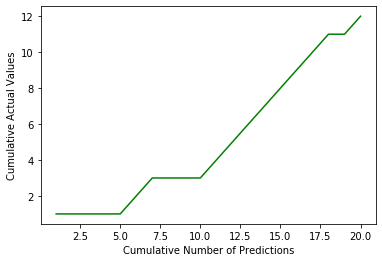

In [199]:
# Sort the actual values by the predictions
data = zip(actual, predicted)
sorted_data = sorted(data, key=lambda d: d[1])
sorted_actual = [d[0] for d in sorted_data]
print('Sorted Actual Values',sorted_actual)
# Sum up the actual values
cumulative_actual = np.cumsum(sorted_actual)
cumulative_index = np.arange(1, len(cumulative_actual)+1)
plt.plot(cumulative_index, cumulative_actual,color = 'green')
plt.xlabel('Cumulative Number of Predictions')
plt.ylabel('Cumulative Actual Values')
plt.show()

In [224]:
from sklearn.tree import export_graphviz
decision_tree = tree.export_graphviz(tree_model,out_file='tree.dot',feature_names=test_x.columns,max_depth=5,filled=True)

In [225]:
!dot -Tpng tree.dot -o tree_limited.png -Gdpi=600

AttributeError: module 'matplotlib.pyplot' has no attribute 'save'

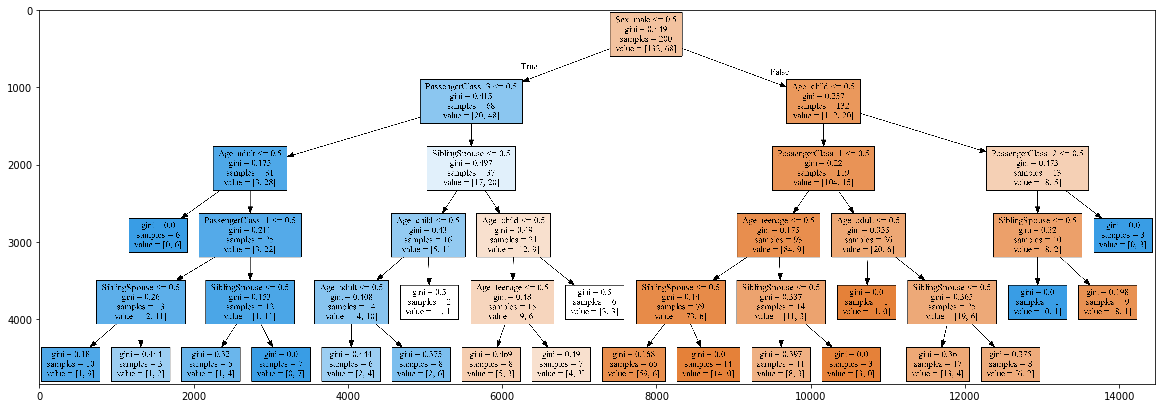

In [234]:
from PIL import Image  
import PIL
image = plt.imread('tree_limited.png')
plt.figure(figsize=(20,15))
plt.imshow(image)
plt.save('tree_depth_5.png')

In [229]:
image.save('tree_depth_5.png')

AttributeError: 'numpy.ndarray' object has no attribute 'save'